In [1]:
import sys
sys.path.append("..")
%cd ..

c:\Users\frede\OneDrive - Danmarks Tekniske Universitet\DTU\6. Semester\Bachelor2021


In [2]:
from statsmodels.tsa.arima.model import ARIMA
from Modelling import modelling
import matplotlib.pyplot as plt
from DataPrep.ImportData import importer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import pyforest

In [3]:
df = importer().LagCreation()

In [4]:
df=df[df["Label"]==0]
df=df.sort_values("Start Date")

In [252]:
X = df[['Energy (kWh)_lag1', 'Energy (kWh)_lag2',
       'Energy (kWh)_lag3', 'Energy (kWh)_lag4', 'Energy (kWh)_lag5']]
y = df[["Energy (kWh)","Start Date"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=False)

In [66]:
y_test.index=y_test["Start Date"]
y_test = y_test.drop(columns="Start Date")
y_train.index=y_train["Start Date"]
y_train = y_train.drop(columns="Start Date")


In [253]:
y_test.index=y_test["Start Date"]
y_test.index = y_test.index.to_period('D')
y_test = y_test.drop(columns="Start Date")

y_train.index=y_train["Start Date"]
y_train.index = y_train.index.to_period('D')
y_train = y_train.drop(columns="Start Date")

In [390]:
result = adfuller(y_train[600:].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print(result[2])

ADF Statistic: -3.509780
p-value: 0.007739
15


In [254]:
y_test = y_test.diff().dropna()
y_train = y_train.diff().dropna()

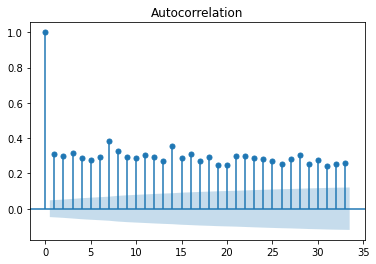

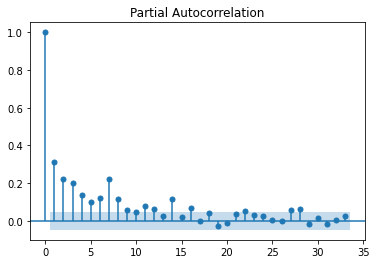

In [391]:
plot_acf(y_train[600:])
plt.show()
plot_pacf(y_train[600:])
plt.show()

In [385]:
model1 = ARIMA(y_train.values[600:] ,order=(7,0,15))

In [356]:
y_train.values.reshape(1,-1) 


array([[1.67988194, 1.8992418 , 1.5744709 , ..., 2.2426    , 2.41232357,
        1.31924103]])

In [343]:
model = auto_arima(y_train.values,start_p=2,start_q=2,trace=True, suppress_warnings=True, method="bfgs")

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2237.692, Time=1.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3596.884, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2931.007, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2097.490, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3594.885, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2099.399, Time=1.31 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2187.547, Time=1.63 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2101.421, Time=2.78 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2095.917, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2097.817, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2185.427, Time=0.57 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2929.007, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2099.847, Time=1.35 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 10.172 seconds


In [386]:
model_fit = model1.fit()
#method="innovations_mle"
#model_fit = model.fit(y_train)

c:\Users\frede\OneDrive - Danmarks Tekniske Universitet\DTU\6. Semester\Bachelor2021\env\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [387]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1703
Model:                ARIMA(7, 0, 15)   Log Likelihood                -843.578
Date:                Thu, 18 Mar 2021   AIC                           1735.156
Time:                        16:48:24   BIC                           1865.719
Sample:                             0   HQIC                          1783.486
                               - 1703                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1194      0.320      6.628      0.000       1.493       2.746
ar.L1          0.0606      0.154      0.394      0.694      -0.241       0.362
ar.L2          0.1301      0.127      1.024      0.306      -0.119       0.379
ar.L3         -0.1281      0.116     -1.101      0.271      -0.356       0.100
ar.L4          0.0592      0.121      0.489      0.625      -0.178       0.297
ar.L5         -0.0364      0.119     -0.306      0.760      -0.270       0.197
ar.L6          0.1407      0.112      1.261      0.207      -0.078       0.359
ar.L7          0.7670      0.115      6.659      0.000       0.541       0.993
ma.L1         -0.0068      0.154     -0.044      0.965      -0.308       0.295
ma.L2         -0.0921      0.127     -0.725      0.468      -0.341       0.157
ma.L3          0.1899      0.113      1.676      0.094      -0.032       0.412
ma.L4         -0.0421      0.124     -0.339      0.734      -0.285       0.201
ma.L5          0.0308      0.122      0.252      0.801      -0.209       0.271
ma.L6         -0.1038      0.115     -0.903      0.366      -0.329       0.121
ma.L7         -0.6308      0.115     -5.503      0.000      -0.855      -0.406
ma.L8          0.0297      0.040      0.741      0.458      -0.049       0.108
ma.L9         -0.0198      0.035     -0.559      0.576      -0.089       0.050
ma.L10        -0.0241      0.035     -0.698      0.485      -0.092       0.044
ma.L11         0.0307      0.038      0.813      0.416      -0.043       0.105
ma.L12         0.0214      0.036      0.588      0.557      -0.050       0.093
ma.L13        -0.0525      0.034     -1.525      0.127      -0.120       0.015
ma.L14        -0.0219      0.038     -0.572      0.567      -0.097       0.053
ma.L15        -0.0444      0.034     -1.288      0.198      -0.112       0.023
sigma2         0.1576      0.002     66.890      0.000       0.153       0.162
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             45743.94
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               1.31   Skew:                             2.23
Prob(H) (two-sided):                  0.00   Kurtosis:                        27.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [366]:
mape = np.mean(np.abs(y_pred - y_test.values)/np.abs(y_test.values))
mape

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.16372310948417312

In [392]:
n=50
y_pred = model_fit.forecast(steps = n)

In [271]:
y_pred.values

array([2.19660739, 2.09313737, 2.05742702, 2.15185088, 2.21031238,
       2.17853638, 2.07383087, 2.12193292, 2.15619112, 2.14918698,
       2.15137106, 2.16994782, 2.16495134, 2.1487357 , 2.1502764 ])

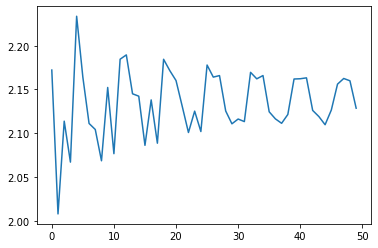

In [393]:
plt.plot(y_pred)
plt.show()

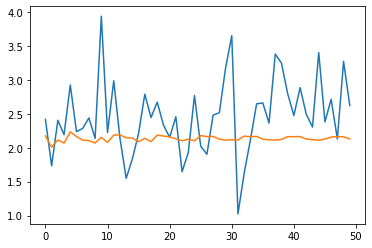

In [394]:
plt.plot(y_test.values[:n])
plt.plot(y_pred)
plt.show()